### ANALYZE PSEI PRICE PERFORMANCE USING SENTIMENTAL AND NUMERICAL ANALYSIS, AND FORECAST PRICE USING MACHINE LEARNING (PART 2)

##### Forecasting using Long Short Term Memory (LSTM) Model

In [11]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


FEATURE ENGINEERING

,Close
Date,
2014-01-02,5984.259766
2014-01-03,5947.930176
2014-01-06,5985.810059
2014-01-07,5947.439941
2014-01-08,5986.479980
...,...
2023-05-08,6600.740234
2023-05-09,6622.609863
2023-05-10,6658.589844


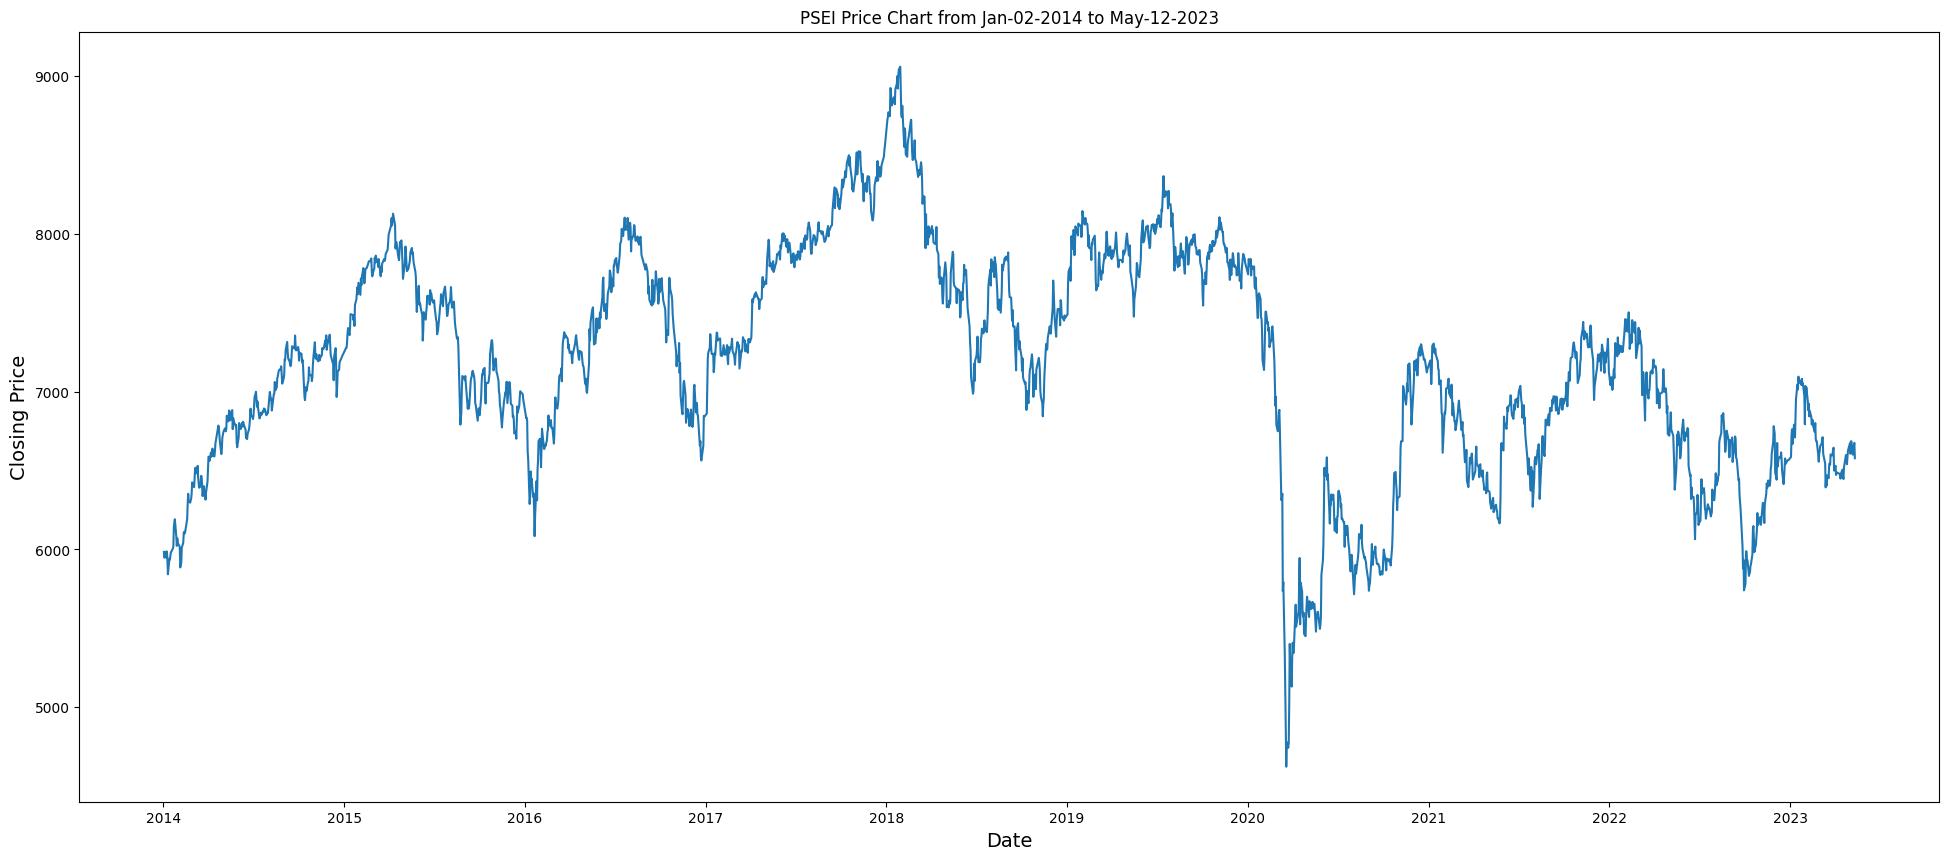

In [2]:
#Import dataset
df_price = pd.read_csv('C:/Users/Jan/Desktop/JAN/GRIP-INTERNSHIP/PSEI-Analysis/PSEI(2014-2023).csv')
#Transform dataset
df_price['Date'] = pd.to_datetime(df_price['Date'])
df_price = df_price.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df_price = df_price.dropna().set_index('Date').sort_values(by='Date')
display(df_price)

plt.figure(figsize=(24, 10))
plt.plot(df_price.index, df_price['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.title('PSEI Price Chart from Jan-02-2014 to May-12-2023')
plt.show() 

### Forcasting using LSTM model

Scaled data shape (2280, 1)
Train data start date: 2014-01-02 00:00:00
Train data end date: 2021-01-19 00:00:00
Train data shape (1710, 1)
Test data start date: 2021-01-20 00:00:00
Test data end date: 2023-05-12 00:00:00
Test data shape (570, 1)


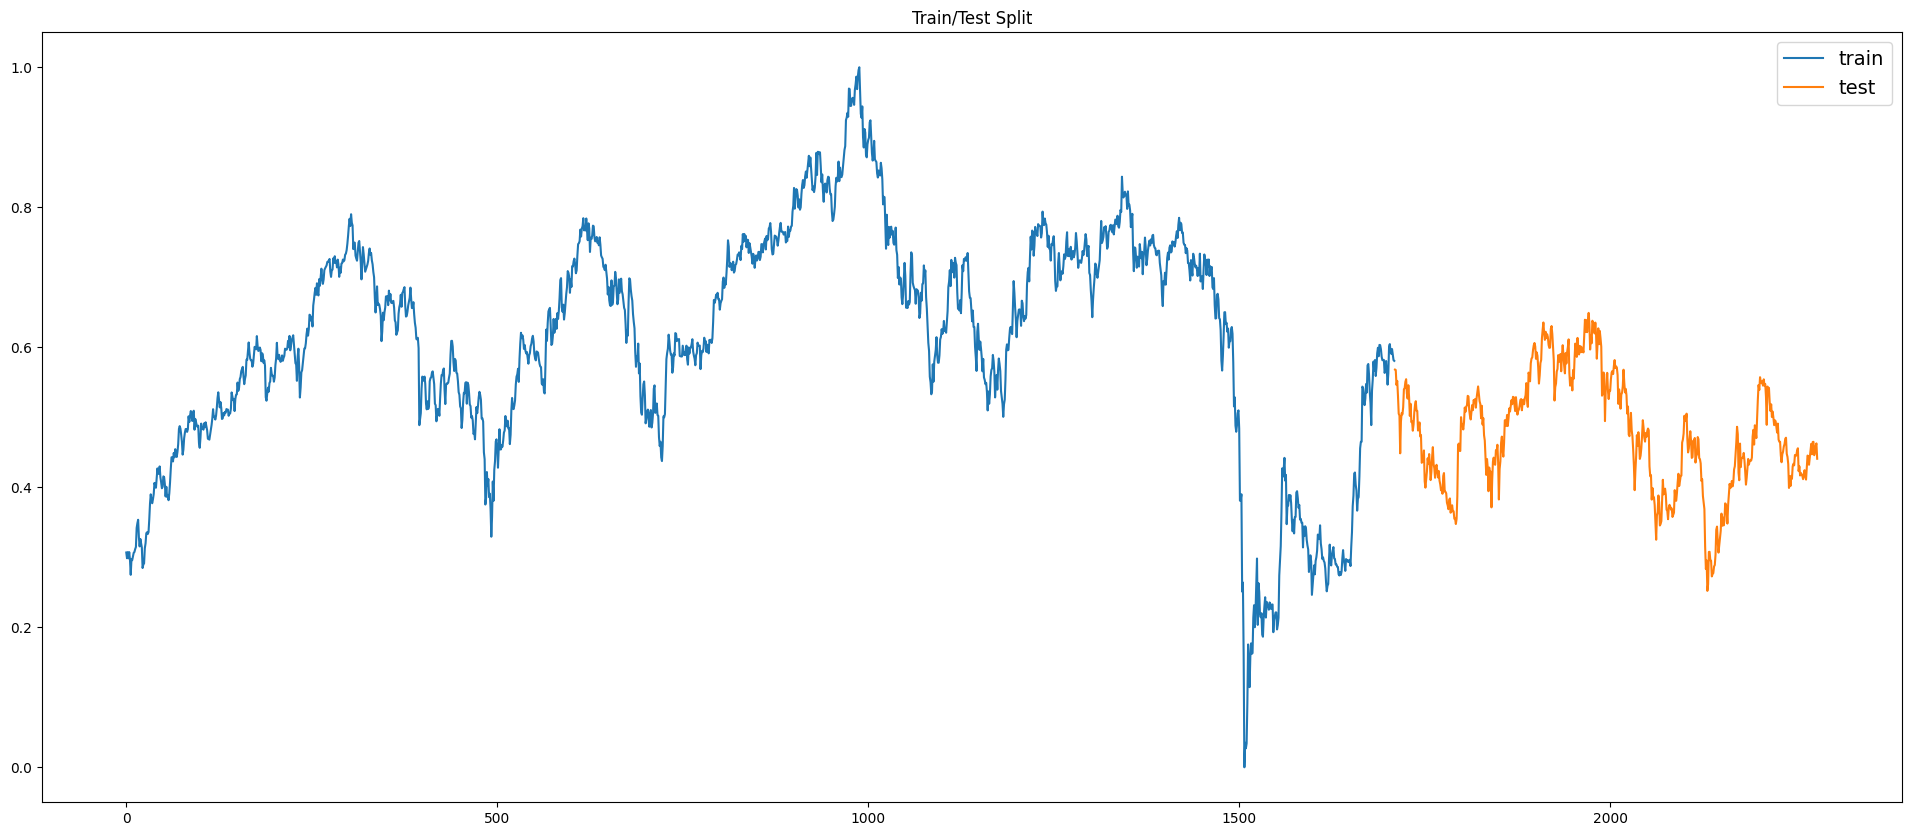

In [3]:
# Preprocess the dataset
data_LSTM = df_price.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_LSTM)
print("Scaled data shape",scaled_data.shape)

# Define the number of time steps to consider
time_steps = 100

# Create the train dataset which is 70% of the original dataset
train_size = int(len(scaled_data) * 0.75)
train_data = scaled_data[0:train_size]
X_train = []
y_train = []
for i in range(time_steps, len(train_data)):
    X_train.append(train_data[i - time_steps:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
x_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # Reshape the input data for LSTM
print("Train data start date:", df_price.index[0])
print("Train data end date:", df_price.index[train_size-1])
print("Train data shape", train_data.shape)

# Create the test dataset 
test_data = scaled_data[train_size:] #test data = unseen data
X_test = []
y_test = []
for i in range(time_steps, len(test_data)):
    X_test.append(test_data[i - time_steps:i, 0])
    y_test.append(test_data[i, 0])
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print("Test data start date:", df_price.index[train_size])
print("Test data end date:", df_price.index[len(df_price)-1])
print("Test data shape", test_data.shape)

test_data_plot = np.empty_like(scaled_data)
test_data_plot[:, :] = np.nan
test_data_plot[len(train_data): , :] = test_data

plt.figure(figsize=(24, 10))
plt.plot(train_data, label='train')
plt.plot(test_data_plot, label='test')
plt.title('Train/Test Split')
plt.legend(fontsize=14)
plt.show()

BUILDING AND TRAINING LSTM MACHINE LEARNING MODEL
LSTM stands for Long 

In [4]:
# Build and Train LSTM model
model_LSTM = Sequential()
model_LSTM.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_LSTM.add(LSTM(50, return_sequences=False))
model_LSTM.add(Dense(25))
model_LSTM.add(Dense(1))
model_LSTM.compile(optimizer='adam', loss='mean_squared_error') # Compiles the model
model_LSTM.fit(X_train, y_train, batch_size=32, epochs=100) # Trains the model

# Perform predictions
predictions_LSTM = model_LSTM.predict(X_test) #produce prediction with equal count agains test data

Epoch 1/200
51/51 [==============================] - 5s 43ms/step - loss: 0.0326
Epoch 2/200
51/51 [==============================] - 2s 44ms/step - loss: 0.0025
Epoch 3/200
51/51 [==============================] - 2s 44ms/step - loss: 0.0018
Epoch 4/200
51/51 [==============================] - 2s 44ms/step - loss: 0.0017
Epoch 5/200
51/51 [==============================] - 2s 43ms/step - loss: 0.0016
Epoch 6/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0014
Epoch 7/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0013
Epoch 8/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0014
Epoch 9/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0014
Epoch 10/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0012
Epoch 11/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0011
Epoch 12/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0011
Epoch 13/200
51/51 [=====

In [5]:
# Check Accuracy of the model
mse = mean_squared_error(predictions_LSTM, y_test)
print('The mean squeted error:',mse)
accuracy = 100 - mse
print(f"Accuracy: {accuracy}%")

The mean squeted error: 0.0003448186998958818
Accuracy: 99.9996551813001%


In [6]:
predictions_LSTM = scaler.inverse_transform(predictions_LSTM) 

# Display the predictions
for i in range(len(predictions_LSTM)):
    print(f"Day {i+1}: Predicted Price = {predictions_LSTM[i][0]}")

Day 1: Predicted Price = 6983.8251953125
Day 2: Predicted Price = 6897.87060546875
Day 3: Predicted Price = 6859.11083984375
Day 4: Predicted Price = 6834.10009765625
Day 5: Predicted Price = 6879.8056640625
Day 6: Predicted Price = 6931.13720703125
Day 7: Predicted Price = 6900.1806640625
Day 8: Predicted Price = 6963.82763671875
Day 9: Predicted Price = 6948.888671875
Day 10: Predicted Price = 6966.33935546875
Day 11: Predicted Price = 6908.87451171875
Day 12: Predicted Price = 6970.13623046875
Day 13: Predicted Price = 7007.98828125
Day 14: Predicted Price = 7043.2939453125
Day 15: Predicted Price = 6998.138671875
Day 16: Predicted Price = 6947.166015625
Day 17: Predicted Price = 6927.5400390625
Day 18: Predicted Price = 6837.068359375
Day 19: Predicted Price = 6918.388671875
Day 20: Predicted Price = 6801.140625
Day 21: Predicted Price = 6843.1591796875
Day 22: Predicted Price = 6735.5205078125
Day 23: Predicted Price = 6700.6064453125
Day 24: Predicted Price = 6593.44482421875
Day

In [7]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 25ms/step
Check:
Predicted Price at May-12-2023 = 6590.84375
Actual Price at May-12-2023 = 6578.149902
Test data start date: 2021-01-20 00:00:00
Test data end date: 2023-05-12 00:00:00
Test data shape (570, 1)


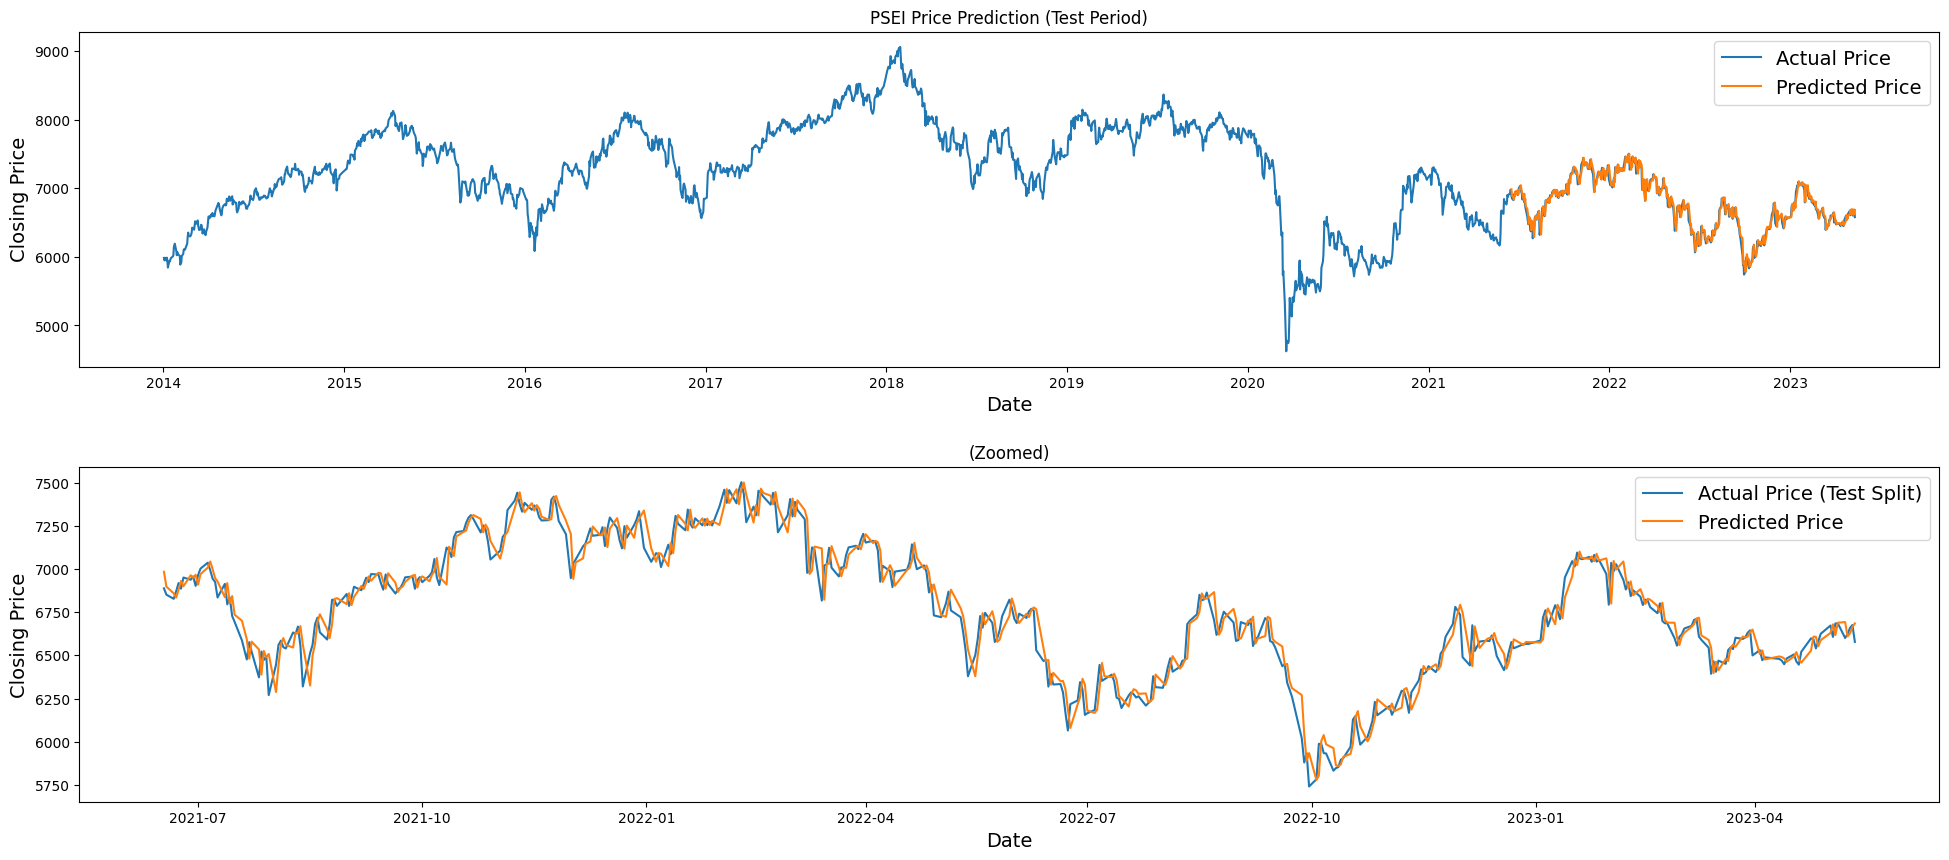

In [8]:
# Compare the recent predicted and actual price
recent_data = df_price[-time_steps:]
recent_prices = recent_data['Close'].values.reshape(-1, 1)
scaled_recent_prices = scaler.transform(recent_prices)
x_recent = np.array([scaled_recent_prices])
x_recent = np.reshape(x_recent, (x_recent.shape[0], x_recent.shape[1], 1))
recent_predictions = model_LSTM.predict(x_recent)
recent_predictions = scaler.inverse_transform(recent_predictions)
print(f"Check:")
print(f"Predicted Price at May-12-2023 = {recent_predictions[0][0]}")
print(f"Actual Price at May-12-2023 = {recent_prices[-1][0]}")
print("Test data start date:", df_price.index[train_size])
print("Test data end date:", df_price.index[len(df_price)-1])
print("Test data shape", test_data.shape)

# Inverse transform y_test
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

plt.figure(figsize=(24, 10))
plt.subplot(2, 1, 1)
plt.plot(df_price.index, df_price['Close'], label='Actual Price')
plt.plot(df_price.index[-len(predictions_LSTM):], predictions_LSTM, label='Predicted Price')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.title('PSEI Price Prediction (Test Period)')
plt.legend(fontsize=14)
plt.subplots_adjust(hspace=0.3)

plt.subplot(2, 1, 2)
plt.plot(df_price.index[-len(predictions_LSTM):], y_test_inverse[:len(predictions_LSTM)], label='Actual Price (Test Split)')
plt.plot(df_price.index[-len(predictions_LSTM):], predictions_LSTM, label='Predicted Price')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Closing Price',fontsize=14)
plt.title('(Zoomed)')
plt.legend(fontsize=14)
plt.show()

This chart shows that after training our train data in LSTM machine learning model, it produced a "Predicted Price" data array with count equal to the test data, which we compared side by side with the actual price data's test split.

1/1 [==============================] - 0s 22ms/step
Day 1 after May-12-2023: Predicted Price = 6590.84375
Day 2 after May-12-2023: Predicted Price = 6597.96630859375
Day 3 after May-12-2023: Predicted Price = 6605.89404296875
Day 4 after May-12-2023: Predicted Price = 6616.2216796875
Day 5 after May-12-2023: Predicted Price = 6627.8251953125
Day 6 after May-12-2023: Predicted Price = 6639.6435546875
Day 7 after May-12-2023: Predicted Price = 6650.966796875
Day 8 after May-12-2023: Predicted Price = 6661.4208984375
Day 9 after May-12-2023: Predicted Price = 6670.8974609375
Day 10 after May-12-2023: Predicted Price = 6679.47265625
Day 11 after May-12-2023: Predicted Price = 6687.3232421875
Day 12 after May-12-2023: Predicted Price = 6694.669921875
Day 13 after May-12-2023: Predicted Price = 6701.7236328125
Day 14 after May-12-2023: Predicted Price = 6708.6611328125
Day 15 after May-12-2023: Predicted Price = 6715.61376953125
Day 16 after May-12-2023: Predicted Price = 6722.66015625
Day 1

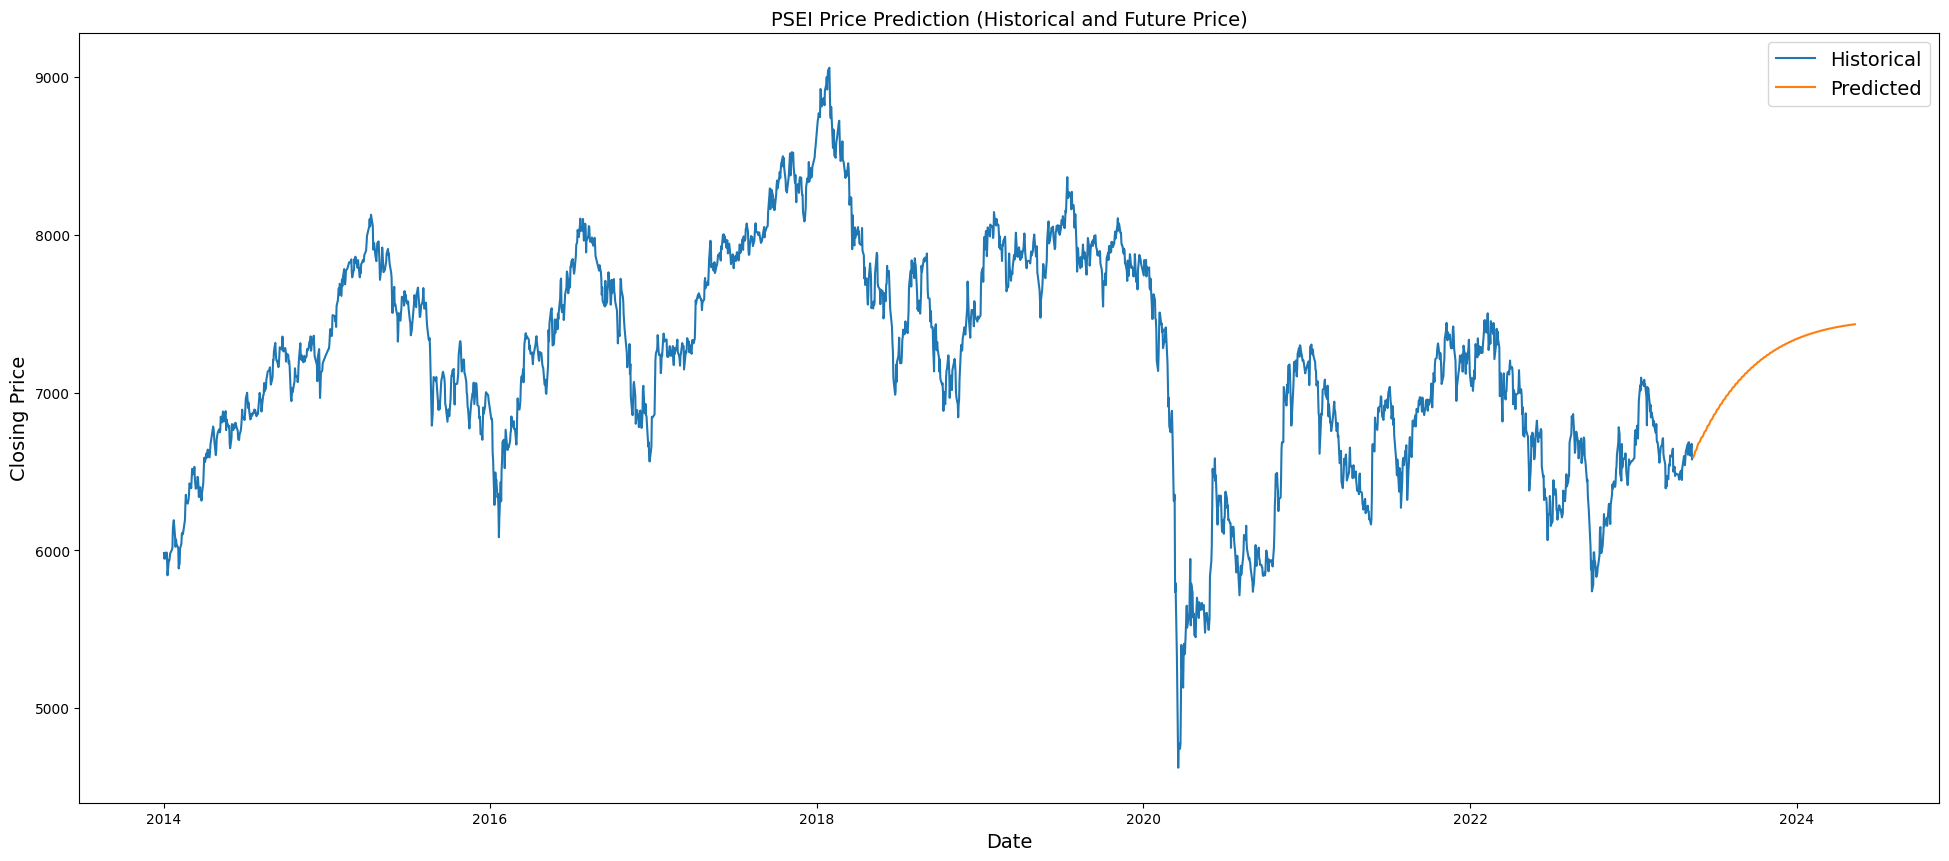

In [9]:
# input number of days to predict
# n_prediction = int(input("Enter the number of days for prediction: "))
n_prediction = 260

# Get the latest data for prediction
latest_data = scaled_data[-time_steps:]
x_latest = np.array([latest_data])
x_latest = np.reshape(x_latest, (x_latest.shape[0], x_latest.shape[1], 1))

# Perform future predictions
future_predictions = []
for _ in range(n_prediction):
    prediction = model_LSTM.predict(x_latest)
    future_predictions.append(prediction[0][0])
    x_latest = np.append(x_latest[:, 1:, :], np.reshape(prediction, (1, 1, 1)), axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Combine historical data with predicted future prices
combined_dates = np.append(df_price.index.values[-time_steps:], pd.bdate_range(start=df_price.index.values[-1], periods=n_prediction+1)[1:])
combined_prices = np.append(data_LSTM[-time_steps:].flatten(), future_predictions.flatten())

# Display the predictions
for i in range(n_prediction):
    print(f"Day {i+1} after May-12-2023: Predicted Price = {future_predictions[i][0]}")
    
plt.figure(figsize=(24, 10))
plt.plot(df_price.index, data_LSTM, label='Historical')
plt.plot(combined_dates[-n_prediction:], combined_prices[-n_prediction:], label='Predicted')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.title('PSEI Price Prediction (Historical and Future Price)', fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [12]:
df_forecast_lstm = pd.DataFrame({'Date': combined_dates, 'Close': combined_prices})
df_forecast_lstm = df_forecast_lstm.tail(260)
display(df_forecast_lstm)

,Date,Close
100,2023-05-15,6590.843750
101,2023-05-16,6597.966309
102,2023-05-17,6605.894043
103,2023-05-18,6616.221680
104,2023-05-19,6627.825195
...,...,...
355,2024-05-06,7431.323242
356,2024-05-07,7431.868652
357,2024-05-08,7432.406250
358,2024-05-09,7432.936523


In [13]:
# df_forecast_lstm.to_excel('df_forecast_lstm.xlsx', index=False)